# 데이터 분할

## 1.환경준비

### (1) 라이브러리 불러오기

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

### (2) 데이터 불러오기

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction.csv'
data = pd.read_csv(path)

# 확인
data.head()

## 2.학습데이터 크기 조정

### (1) 데이터 일부 추출

In [ ]:
# 결측치 제거
data.dropna(inplace=True) 

# 5,000개만 추출
data0 = data.sample(5000, random_state=20) 

### (2) 간단한 전처리

In [ ]:
# 불필요한 변수 제거
del_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data0.drop(del_cols, axis=1, inplace=True)

# 가변수화
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data0 = pd.get_dummies(data0, columns=dumm_cols, drop_first=True)

In [ ]:
# x, y 분리
target = 'satisfaction'
x = data0.drop(target, axis=1)
y = data0.loc[:, target]

# 데이터 크기 확인
x.shape

### (3) 학습데이터 크기 조정

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

* 학습곡선 그리기
    * 데이터를 10건~6010건까지 20건씩 증가시켜가며
    * 그때그때마다 모델을 학습시키고 성능측정 

In [ ]:
# 모셀선언
m1 = LogisticRegression()

# Learning Curve 수행
tr_size, tr_sc, val_sc = learning_curve(m1, x, y,
                                        train_sizes=range(10, 4000, 20),
                                        cv=5)     

* 결과 확인하기

In [ ]:
# 아래와 같이 학습데이터의 수를 조절하며
tr_size[:5], tr_size[-5:]

In [ ]:
# 그때 그때 마다의 학습데이터 성능 
# cv(cross validation) = 5 지정했으므로 각 train size 마다 5개씩 성능 결과가 보임
tr_sc[:5], tr_sc[-5:]

In [ ]:
# 그때 그때 마다의 검증 데이터 성능 
# cv(cross validation) = 5 지정했으므로 각 train size 마다 5개씩 성능 결과가 보임
val_sc[:5], val_sc[-5:]

In [ ]:
# cv 마다 평균 성능 계산
tr_mean_lr = tr_sc.mean(axis=1)
val_mean_lr = val_sc.mean(axis=1)

tr_size[:5], tr_sc[:5], tr_mean_lr[:5]

* 결과 시각화

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, tr_mean_lr, label = 'train_score')
plt.plot(tr_size, val_mean_lr, label = 'val_score')

# 꾸미기
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend()
plt.grid()
plt.show()

### (4) 실습
* Decision Tree 모델로 학습곡선 테스트를 수행해 봅시다.
    * 실험1 : max_depth = 3 으로 모델을 생성한 후 학습데이터 크기에 따른 성능 곡선을 그려봅시다.
    * 실험2 : max_depth = 5 모델 생성후 학습곡선을 그리되, 위에서 그렸던 로지스틱회귀모델의 val_score 곡선, 실험 1의 val_score 곡선과 비교하는 그래프를 그려봅시다.

#### 1) max_depth=3

In [ ]:
# 모셀선언

# Learning Curve 수행


In [ ]:
# CV 결과 --> 평균


In [ ]:
# 시각화


#### 2) max_depth=5

In [ ]:
# 모셀선언

# Learning Curve 수행


In [ ]:
# CV 결과 --> 평균


In [ ]:
# 시각화


#### 3) depth = 3, depth = 5, logistic regression 모델 비교

## 3.교차검증

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 

### (1) 데이터에 따른 성능의 편차

* 100번 반복 실행하면서, 데이터 랜덤분할, 모델링, 예측, 성능결과 담기

In [ ]:
result = []
for i in range(100):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

    model = DecisionTreeClassifier(max_depth = 3)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    result.append(accuracy_score(y_val, pred))

* 위에서 100번 실행한 결과의 기초통계량과 그래프를 그려 봅시다.

In [ ]:
display(pd.DataFrame(result).describe().T)

sns.kdeplot(result)
plt.axvline(np.mean(result), color = 'r')
plt.grid()
plt.show()

### (2) k-fold Cross Validation

계획적으로 분할, 학습, 검증하는 방식을 사용해 봅시다!


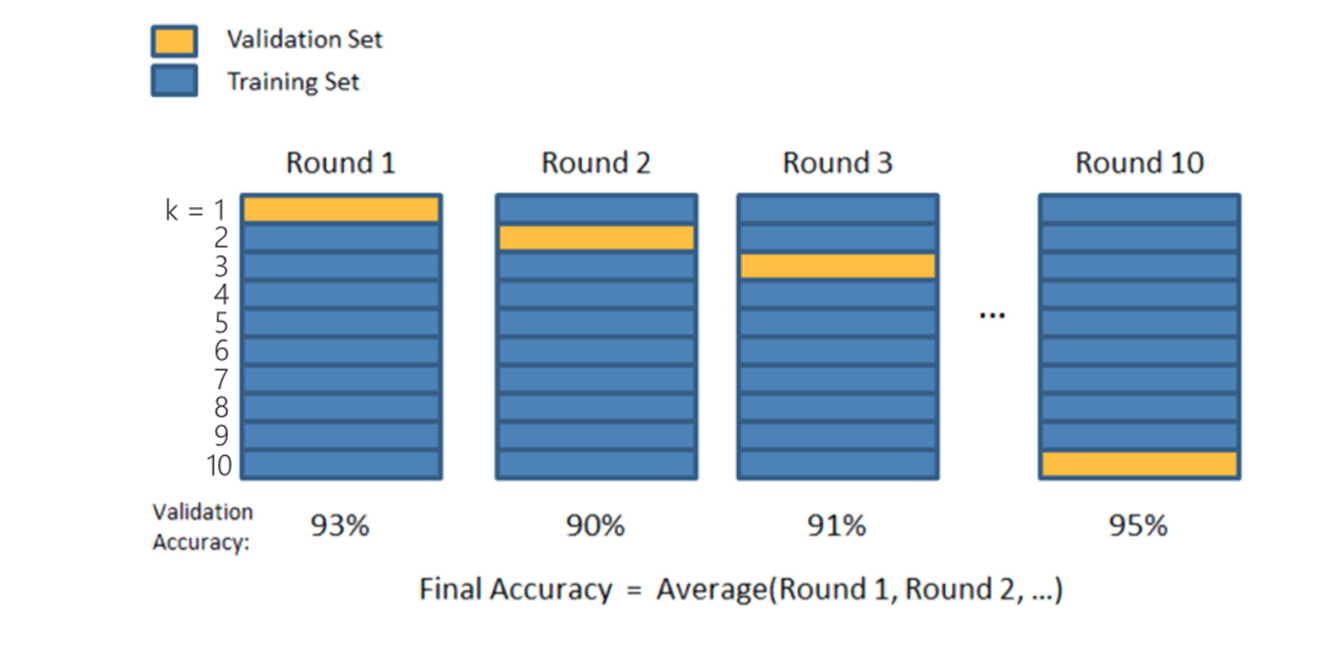

* k개의 겹으로 나눠서 교차 검증한다는 의미 입니다. 
* 위 그림에서 round는 모델링 및 검증 시도 횟수 입니다.
* 교차검증할 때, 알고리즘과 하이퍼파라미터 등의 값 설정은 고정 입니다.
* [decision tree 알고리즘에 max_depth = 4인 모델]을 만들고 교차 검증한다고 할 때,
    * k = 10, 10개로 데이터를 분할
    * round 1
        * 분할된 데이터 중 첫번째를 validation set으로, 나머지는 train set으로 두고 학습하고 검증하여 정확도가 93%
    * round 2
        * 두번째를 validation set으로, 나머지는 train set으로 두고 학습하고 검증하여 정확도가 90%
    * 이렇게 round 10까지 반복하면 성능결과가 총 10개가 됩니다.
    * 이들의 평균으로 [decision tree 알고리즘, max_depth = 4인 모델]의 성능을 평가합니다.


In [ ]:
from sklearn.model_selection import cross_val_score

* 의사결정나무로 교차검증하기

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
dt_result = cross_val_score(model, x, y, cv=10)

In [ ]:
dt_result

In [ ]:
# 평균 성능과 표준편차
print(dt_result.mean(), dt_result.std())

* 100번 수행한 성능의 평균과 교차검증 성능 비교

In [ ]:
np.mean(result), np.mean(dt_result)

### (3) 실습
* 실험1 Logistic Regression 모델에 대한 교차검증 성능을 구하시오.
* 실험2 Decision Tree max_depth = 5 모델에 대한 교차검증 성능을 구하시오.

#### 1) 실험1
Logistic Regression 모델에 대한 교차검증 성능을 구하시오.

In [ ]:
model2 = 

lr_result = 

In [ ]:
# cv 수행한 결과.


In [ ]:
# 평균 성능과 표준편차


#### 2) 실험2
Decision Tree max_depth = 5 모델에 대한 교차검증 성능을 구하시오.

In [ ]:
model3 = 

dt5_result = 

In [ ]:
# cv 수행한 결과.


In [ ]:
# 평균 성능과 표준편차


### (4) 모델들의 성능비교
세 모델의 성능을 비교해 봅시다.

In [ ]:
# 평균으로 비교하기
print(f'의사결정나무(d=3) : 평균 : {dt_result.mean()}')
print(f'의사결정나무(d=5) : 평균 : {dt5_result.mean()}')
print(f'로지스틱회귀 : 평균 : {lr_result.mean()}')

# 그래프로 비교해 봅시다.
plt.figure(figsize = (8,6))

# 의사결정 나무
sns.kdeplot(dt_result, label = 'DT(depth = 3)')
plt.axvline(np.mean(dt_result), color = 'blue')

# 의사결정 나무
sns.kdeplot(dt5_result, label = 'DT(depth = 5)')
plt.axvline(np.mean(dt5_result), color = 'orange')

# 로지스틱회귀
sns.kdeplot(lr_result, label = 'LogisticRegression')
plt.axvline(np.mean(lr_result), color = 'green')

plt.legend()
plt.grid()
plt.show()

## 4.시계열 데이터의 분할

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

### (1) 데이터준비

* 데이터 불러오기

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date','sales','tot_sales','comp_sales'])
data = data.loc[data['date']<= '2015-12-31'].reset_index(drop = True)
data.head(10)

* 간단한 전처리

In [ ]:
target = 'sales'
x = data.drop([target,'date'], axis=1)
y = data.loc[:, target]

### (2) train, val 분할
* 시간의 흐름에 맞게 분할하기
    * train_test_split(  ,  ,  ,  shuffle = False)
        * train_test_split은 기본적으로 데이터를 섞어서 분할합니다.
        * shuffle = False로 지정하면 입력된 데이터셋을 섞지 않고 그대로 분할합니다.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 200,
                                                  shuffle = False)

In [ ]:
x.tail()

In [ ]:
x_val.tail()

In [ ]:
x.tail()

### (3) 교차검증을 위한 분할

* 다음의 조건으로 Cross Validation을 수행하겠습니다.
    * 3-fold
    * Validation 기간 30일

* TimeSeriesSplit : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
x.shape

* 교차검증 오브젝트 선언하기

In [ ]:
# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

* 데이터셋으로 부터 교차검증을 위한 인덱스 만들기

In [ ]:
# .split을 이용하여 fold 하나씩 인덱스들을 뽑아 낼 수 있음.
for train_index, val_index in tscv.split(x):
    print("Train:", train_index, "Val:", val_index)

* 교차검증용 인덱스로 교차검증 코드 구현하기

In [ ]:
# 모델 선언
model = DecisionTreeRegressor()

In [ ]:
rmse, mae, mape = [],[],[]
pred = []

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_val, y_val = x.iloc[val_index], y.iloc[val_index]

    # 학습
    model.fit(x_train, y_train)

    # 예측
    pr = model.predict(x_val)
    pred += list(pr)

    # 평가
    rmse.append(mean_squared_error(y_val, pr, squared = False))
    mae.append(mean_absolute_error(y_val, pr))
    mape.append(mean_absolute_percentage_error(y_val, pr))

np.mean(rmse), np.mean(mae), np.mean(mape)

* 실제값과 예측 결과 시각화

In [ ]:
# 날짜 축 데이터 준비하기
date_list = pd.to_datetime(data['date'][-(val_size)*nfold:])
date_list

In [ ]:
# 시각화
plt.figure(figsize = (10,6))
plt.plot(date_list, y.iloc[-1* val_size*nfold: ].values, label = 'actual')
plt.plot(date_list, pred, label = 'predict')
plt.legend()
plt.grid()
plt.show()

### (4) 실습
* Linear Regression 모델에 대해서 교차검증을 수행하시오.
    * val_size = 30
    * nfold = 3
* Decision Tree 모델의 성능과 비교해 봅시다.

* 실제값과 예측 결과 시각화